In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('cricket_dataset.csv')
df.head()

,Match_ID,Team_1,Team_2,Venue,Toss_Winner,Toss_Decision,Winner,Win_Margin,Innings,Batting_Team,Total_Runs,Wickets_Lost,Extras,Overs_Faced,Run_Rate,Bowling_Team,Best_Bowler,Best_Batsman
0,1,Australia,New Zealand,Colombo,New Zealand,Bat,Australia,75.0,1,Australia,207,7,8,20.000339,10.349825,New Zealand,NaN,Player_6
1,1,Australia,New Zealand,Colombo,New Zealand,Bat,Australia,75.0,2,New Zealand,230,8,9,48.946845,4.698975,Australia,Player_12,Player_6
2,2,New Zealand,England,Johannesburg,England,Bat,New Zealand,59.0,1,New Zealand,289,6,16,27.822665,10.387215,England,Player_12,Player_20
3,2,New Zealand,England,Johannesburg,England,Bat,New Zealand,59.0,2,England,289,8,19,36.643510,7.886799,New Zealand,Player_12,Player_20
4,3,Australia,Sri Lanka,Mumbai,Australia,Bowl,No Result,NaN,1,Australia,179,8,6,28.489578,6.282999,Sri Lanka,Player_15,Player_7


In [6]:
# Check missing values count per column
missing_values = df.isnull().sum()
missing_values

Match_ID          0
Team_1            0
Team_2            0
Venue             0
Toss_Winner       0
Toss_Decision     0
Winner            0
Win_Margin       36
Innings           0
Batting_Team      0
Total_Runs        0
Wickets_Lost      0
Extras            0
Overs_Faced       0
Run_Rate          0
Bowling_Team      0
Best_Bowler      21
Best_Batsman     20
dtype: int64

In [12]:
 # Removing Duplicate Records
# Fill missing values
df["Win_Margin"].fillna(0, inplace=True)
df["Best_Bowler"].fillna("Unknown", inplace=True)
df["Best_Batsman"].fillna("Unknown", inplace=True)

# Verify if missing values are handled 
df.isnull().sum()




C:\Users\AMAN RAJ\AppData\Local\Temp\ipykernel_20512\911955565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Win_Margin"].fillna(0, inplace=True)


Match_ID         0
Team_1           0
Team_2           0
Venue            0
Toss_Winner      0
Toss_Decision    0
Winner           0
Win_Margin       0
Innings          0
Batting_Team     0
Total_Runs       0
Wickets_Lost     0
Extras           0
Overs_Faced      0
Run_Rate         0
Bowling_Team     0
Best_Bowler      0
Best_Batsman     0
dtype: int64

In [91]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
# Remove duplicates
df_cleaned = df.drop_duplicates()
# New shape after removing duplicates
new_shape = df_cleaned.shape
duplicate_count, new_shape 

(5, (200, 18))

In [23]:
# Standardizing Categorical Values

# Function to standardize categorical values (lowercase and strip spaces)
def clean_text(value):
    if isinstance(value, str):
        return value.strip().title()  # Strips spaces and converts to Title Case
    return value

# Apply cleaning function to categorical columns
for col in ["Team_1", "Team_2", "Venue", "Toss_Winner", "Toss_Decision", 
            "Winner", "Batting_Team", "Bowling_Team", "Best_Bowler", "Best_Batsman"]:
    df_cleaned[col] = df_cleaned[col].apply(clean_text)

# Verify cleaned unique values
cleaned_unique_values = {col: df_cleaned[col].unique() for col in ["Team_1", "Team_2", "Venue", "Toss_Winner", "Winner"]}
cleaned_unique_values


C:\Users\AMAN RAJ\AppData\Local\Temp\ipykernel_20512\1971456378.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].apply(clean_text)


{'Team_1': array(['Australia', 'New Zealand', 'Sri Lanka', 'England', 'South Africa',
        'Pakistan', 'West Indies', 'India'], dtype=object),
 'Team_2': array(['New Zealand', 'England', 'Sri Lanka', 'West Indies', 'Pakistan',
        'India', 'Australia', 'South Africa'], dtype=object),
 'Venue': array(['Colombo', 'Johannesburg', 'Mumbai', 'Karachi', 'Sydney',
        'Auckland', 'Barbados', 'Lords'], dtype=object),
 'Toss_Winner': array(['New Zealand', 'England', 'Australia', 'West Indies',
        'South Africa', 'India', 'Pakistan', 'Sri Lanka'], dtype=object),
 'Winner': array(['Australia', 'New Zealand', 'No Result', 'West Indies', 'England',
        'Pakistan', 'South Africa', 'India', 'Sri Lanka'], dtype=object)}

In [25]:
  # 2. Exploratory Data Analysis (EDA)
# a.Univariate Analysis (Single-Variable Exploration) 
# Summary Statistics 
# Compute summary statistics for numerical columns
summary_stats = df_cleaned.describe().T

# Compute additional statistics: Mode, Variance, and Skewness
additional_stats = pd.DataFrame({
    "Mode": df_cleaned.mode().iloc[0],
    "Variance": df_cleaned.var(numeric_only=True),
    "Skewness": df_cleaned.skew(numeric_only=True)
})

# Combine both summary and additional statistics
summary_results = summary_stats.join(additional_stats)

summary_results 



,count,mean,std,min,25%,50%,75%,max,Mode,Variance,Skewness
Match_ID,200.0,50.500000,28.938507,1.000000,25.750000,50.500000,75.250000,100.000000,1.0,837.437186,0.000000
Win_Margin,200.0,39.880000,31.160399,0.000000,11.000000,36.000000,65.500000,97.000000,0.0,970.970452,0.256473
Innings,200.0,1.500000,0.501255,1.000000,1.000000,1.500000,2.000000,2.000000,1.0,0.251256,0.000000
Total_Runs,200.0,212.590000,70.267986,101.000000,162.500000,205.500000,252.250000,500.000000,200.0,4937.589849,1.517058
Wickets_Lost,200.0,5.965000,1.973130,3.000000,4.000000,6.000000,8.000000,9.000000,4.0,3.893241,0.017416
Extras,200.0,12.050000,4.517693,5.000000,8.000000,13.000000,16.000000,19.000000,6.0,20.409548,-0.044219
Overs_Faced,200.0,32.599636,10.550420,15.008313,23.207023,32.834683,41.653928,49.753768,15.008313,111.311358,-0.062921
Run_Rate,200.0,7.183177,3.469628,2.223883,4.761692,6.348549,8.473295,19.819059,2.223883,12.038316,1.142485


In [27]:
# Compute frequency distributions for categorical columns
categorical_columns = ["Team_1", "Team_2", "Venue", "Toss_Winner", "Toss_Decision", "Winner"]
frequency_distributions = {col: df_cleaned[col].value_counts() for col in categorical_columns}

frequency_distributions


{'Team_1': Team_1
 Australia       34
 New Zealand     32
 England         30
 South Africa    26
 Pakistan        22
 Sri Lanka       20
 India           20
 West Indies     16
 Name: count, dtype: int64,
 'Team_2': Team_2
 England         40
 West Indies     28
 New Zealand     24
 Pakistan        24
 India           22
 Australia       22
 South Africa    22
 Sri Lanka       18
 Name: count, dtype: int64,
 'Venue': Venue
 Auckland        30
 Mumbai          28
 Karachi         28
 Lords           28
 Colombo         24
 Johannesburg    24
 Barbados        22
 Sydney          16
 Name: count, dtype: int64,
 'Toss_Winner': Toss_Winner
 New Zealand     32
 South Africa    30
 England         26
 Australia       26
 West Indies     24
 India           24
 Pakistan        22
 Sri Lanka       16
 Name: count, dtype: int64,
 'Toss_Decision': Toss_Decision
 Bat     104
 Bowl     96
 Name: count, dtype: int64,
 'Winner': Winner
 New Zealand     30
 England         30
 Australia       26
 Pak

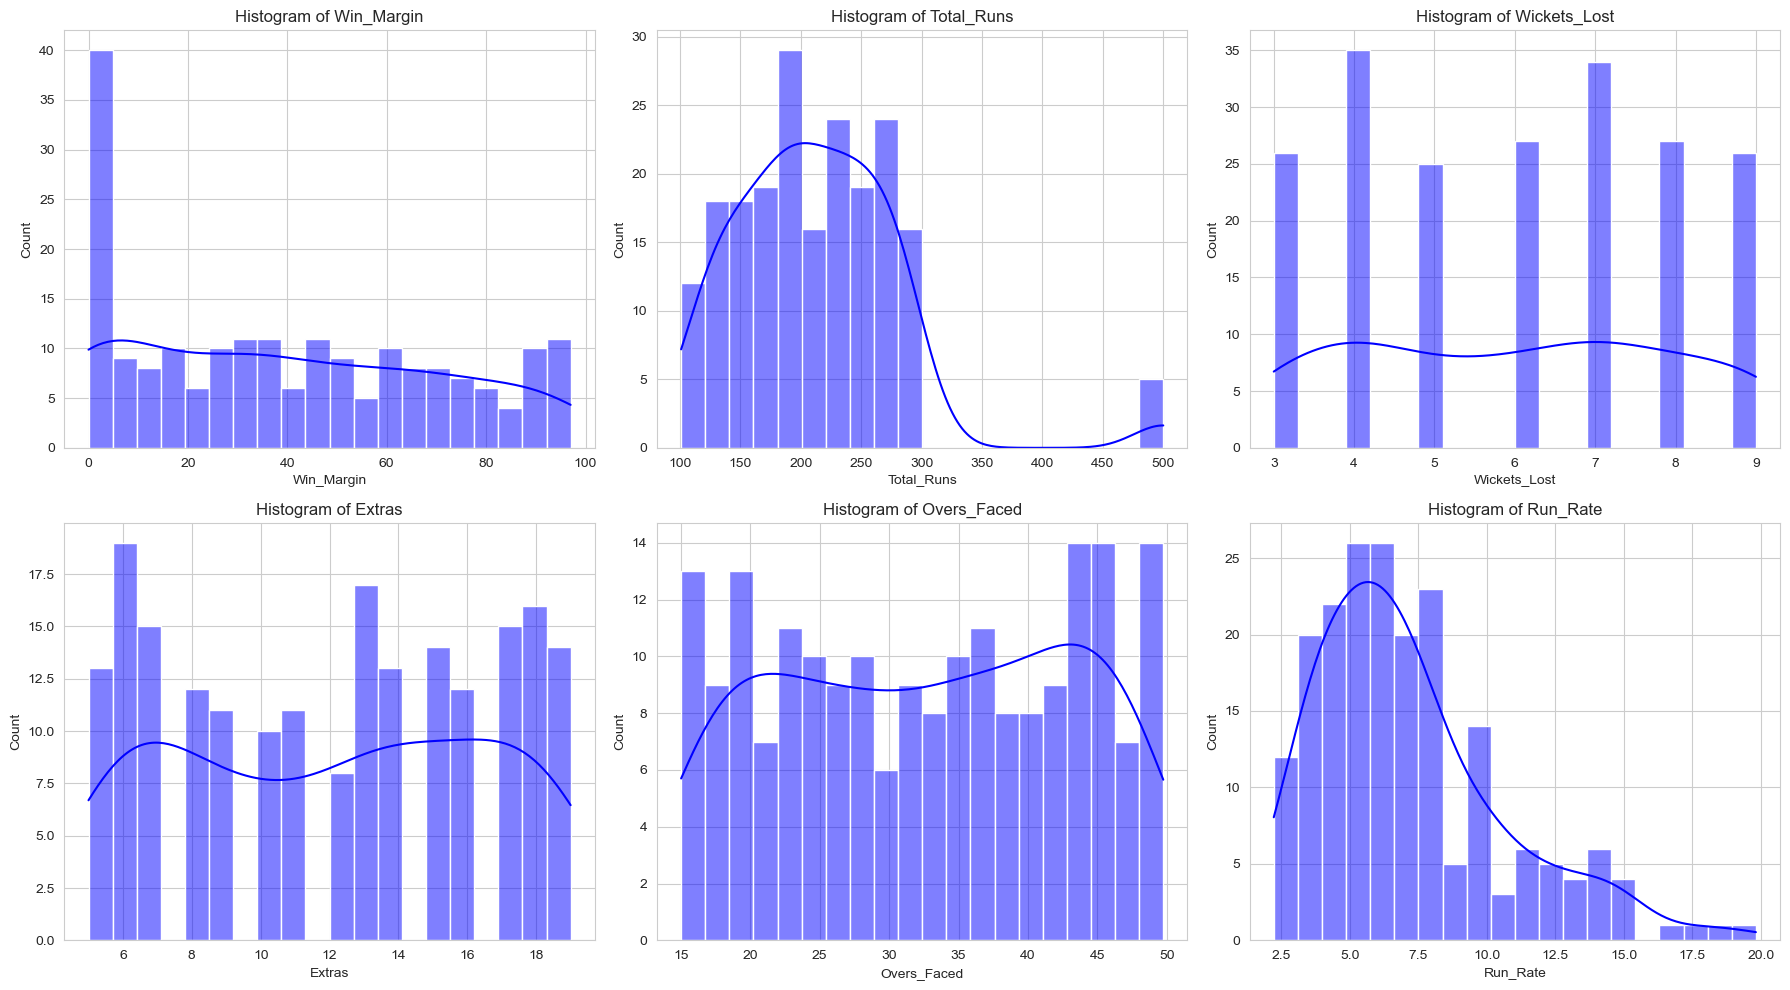

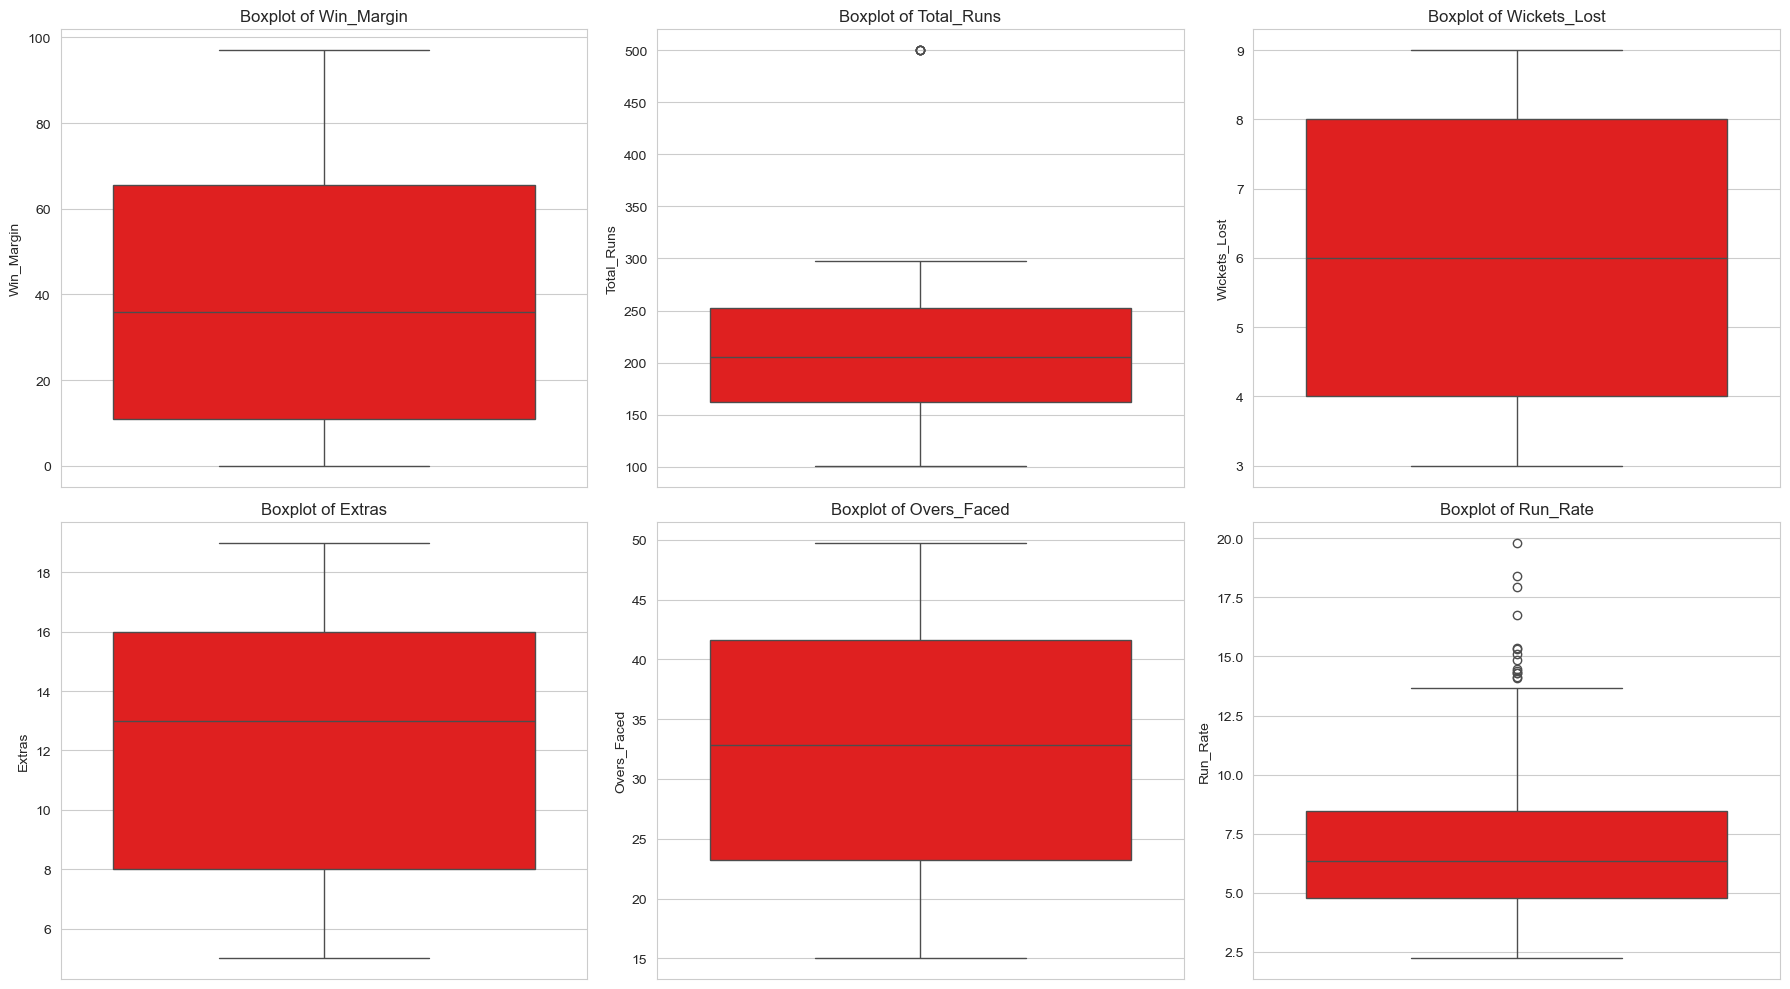

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# List of numerical columns to visualize
numerical_columns = ["Win_Margin", "Total_Runs", "Wickets_Lost", "Extras", "Overs_Faced", "Run_Rate"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_columns):
    sns.histplot(df_cleaned[col], bins=20, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

# Create box plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df_cleaned[col], ax=axes[i], color="red")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


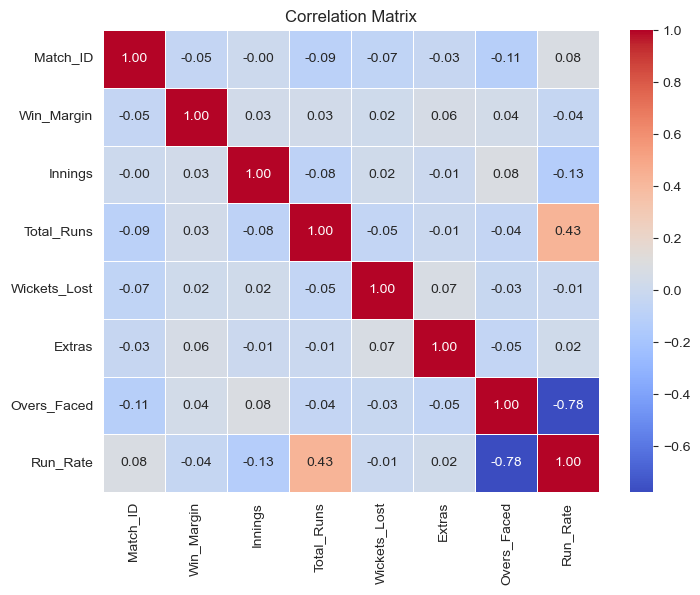

In [31]:
#  Bivariate Analysis (Two-Variable Exploration)

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



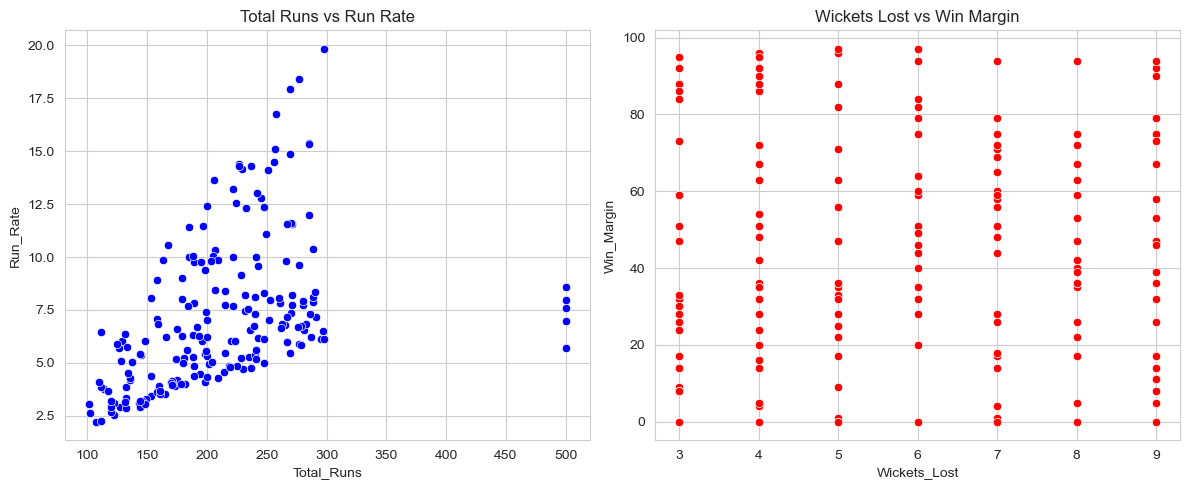

In [35]:
# Scatter plots to visualize relationships
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Total Runs vs Run Rate
sns.scatterplot(x=df_cleaned["Total_Runs"], y=df_cleaned["Run_Rate"], ax=axes[0], color="blue")
axes[0].set_title("Total Runs vs Run Rate")

# Wickets Lost vs Win Margin
sns.scatterplot(x=df_cleaned["Wickets_Lost"], y=df_cleaned["Win_Margin"], ax=axes[1], color="red")
axes[1].set_title("Wickets Lost vs Win Margin")

plt.tight_layout()
plt.show()


C:\Users\AMAN RAJ\AppData\Local\Temp\ipykernel_20512\154600161.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_cleaned["Toss_Decision"], y=df_cleaned["Total_Runs"], ci=None, palette="pastel")
C:\Users\AMAN RAJ\AppData\Local\Temp\ipykernel_20512\154600161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cleaned["Toss_Decision"], y=df_cleaned["Total_Runs"], ci=None, palette="pastel")


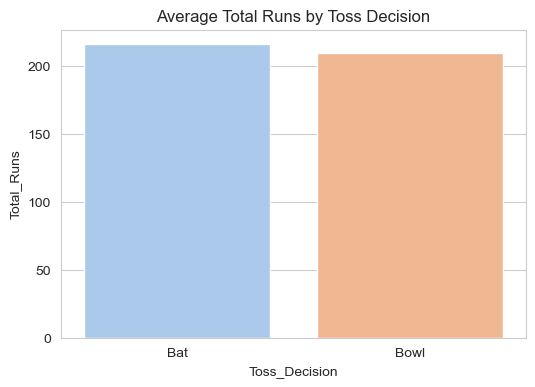

In [47]:
# Comparing Categorical and Numerical Variables

# Bar plot: Average Total Runs by Toss Decision
plt.figure(figsize=(6, 4))
sns.barplot(x=df_cleaned["Toss_Decision"], y=df_cleaned["Total_Runs"], ci=None, palette="pastel")
plt.title("Average Total Runs by Toss Decision")
plt.show()



C:\Users\AMAN RAJ\AppData\Local\Temp\ipykernel_20512\896616712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_cleaned["Winner"], y=df_cleaned["Run_Rate"], palette="muted")


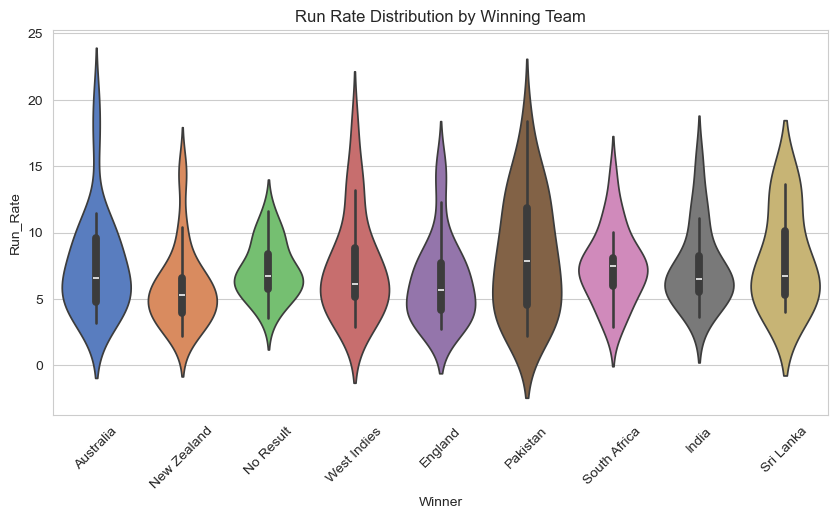

In [43]:
# Violin plot: Run Rate distribution by Winner
plt.figure(figsize=(10, 5))
sns.violinplot(x=df_cleaned["Winner"], y=df_cleaned["Run_Rate"], palette="muted")
plt.xticks(rotation=45)
plt.title("Run Rate Distribution by Winning Team")
plt.show() 

C:\Users\AMAN RAJ\AppData\Local\Temp\ipykernel_20512\2389839103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned["Toss_Decision"], y=df_cleaned["Win_Margin"], palette="coolwarm")


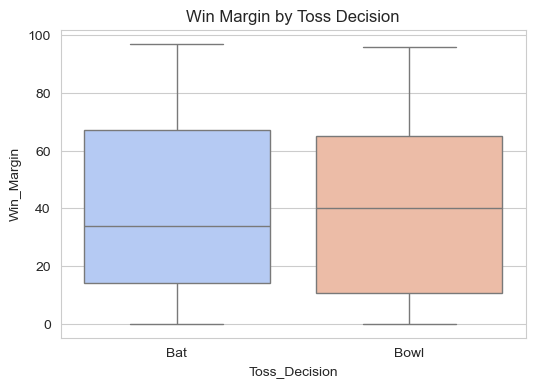

In [45]:
# Box plot: Win Margin by Toss Decision
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned["Toss_Decision"], y=df_cleaned["Win_Margin"], palette="coolwarm")
plt.title("Win Margin by Toss Decision")
plt.show()


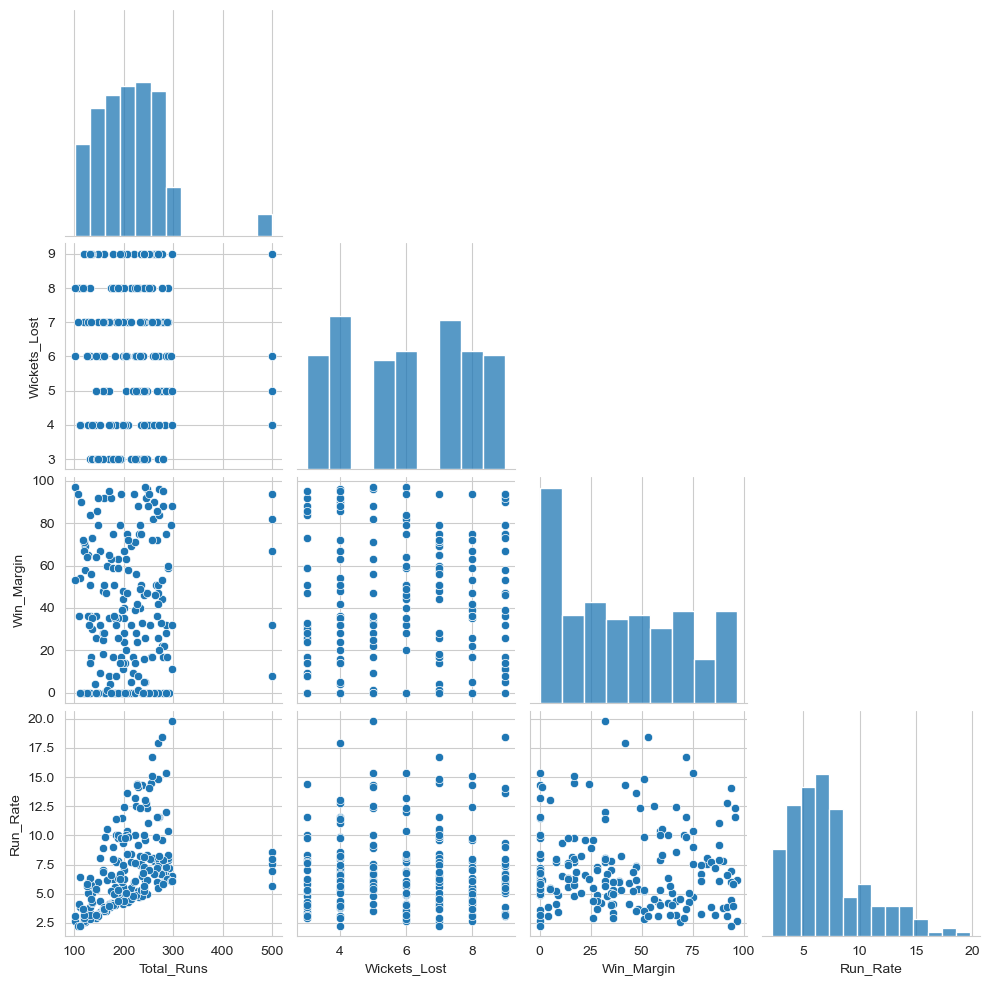

In [75]:
#  Multivariate Analysis (Multiple Variables Exploration)
# Step 1: Pair Plots (Multiple Relationships Simultaneously)
# Pair plot for numerical variables
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pair plot
num_cols = ["Total_Runs", "Wickets_Lost", "Win_Margin", "Run_Rate"]

# Generate pair plot
sns.pairplot(df_cleaned[num_cols], diag_kind="hist", corner=True)

# Show the plot
plt.show()






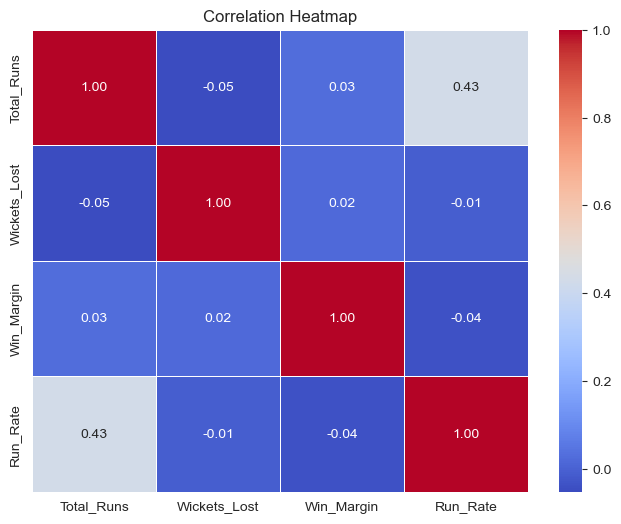

In [83]:
 
#Heatmap (Visualizing Correlations Among Multiple Variables) 
# Heatmap to visualize correlation among multiple variables
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



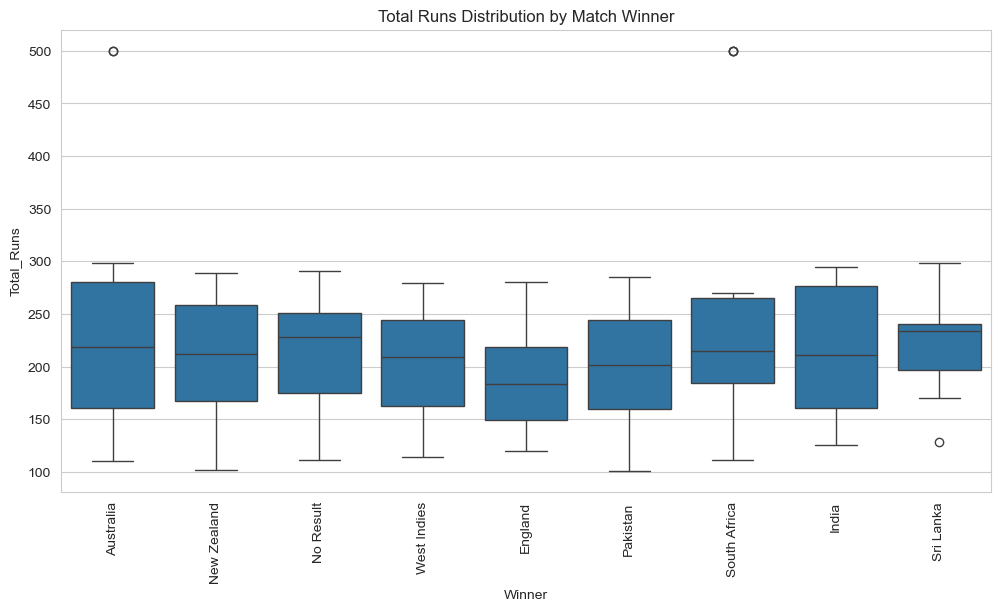

In [85]:
 # Grouped Comparisons (Analyzing Combined Effects of Multiple Features)
# Box plot to compare "Total_Runs" across different "Winner" categories
plt.figure(figsize=(12, 6))
sns.boxplot(x="Winner", y="Total_Runs", data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Total Runs Distribution by Match Winner")
plt.show()

